In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import ray
import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.ppo.appo as appo
import ray.rllib.agents.ddpg as ddpg
import ray.rllib.agents.ddpg.td3 as td3
import ray.rllib.agents.sac as sac
import ray.rllib.agents.a3c as a3c
import ray.rllib.agents.a3c.a2c as a2c
import ray.rllib.agents.dqn.apex as apex
import ray.rllib.agents.impala as impala
import ray.rllib.agents.pg as pg
import ray.rllib.agents.ars as ars
import ray.rllib.agents.es as es
import seagul.envs
import numpy as np
from numpy import pi
import gym
import pybullet_envs
from ray.rllib.models import ModelCatalog

from seagul.rllib.rllib_with_rbf.rbf_net import RBFModel1, RBFModel2
from seagul.rllib.rllib_with_rbf.mlp_net import MyKerasModel1, MyKerasModel2

Using TensorFlow backend.


ImportError: cannot import name 'MyKerasModel1'

In [4]:
# !! modify these as appropiate

algos = {
    0: "A2C",
    1: "A3C",
    2: "APEX",
    3: "APPO",
    4: "DDPG",
    5: "IMPALA",
    6: "PG",
    7: "PPO",
    8: "SAC",
    9: "TD3",
    11: "ES"
}
envs = {
    0: "HumanoidBulletEnv-v0",
    1: "Walker2DBulletEnv-v0",
    2: "Pendulum-v0",
    3: "HalfCheetahBulletEnv-v0"
}
alg = algos[8]
current_env = envs[3]
checkpoint = "153"
home_path = '/home/grabka/Documents/seagul/seagul/rllib/rllib_with_rbf/data/HalfCheetah/MLP/SAC/SAC_HalfCheetahBulletEnv-v0_mlp_2_64_2020-02-10_12-22-29h6gj4tm_/'

checkpoint_path = home_path + "checkpoint_" + checkpoint + "/checkpoint-" + checkpoint

In [5]:
#config = json.load(open(home_path + "params.json"))
#df = pd.read_csv(home_path + "progress.csv")

In [6]:
# Some delightfully ugly python to infer where everything else is...
csv_path = '/'.join(checkpoint_path.split('/')[:-2]) + '/progress.csv'
save_name = checkpoint_path.split('/')[-3]
expr_file = "/experiment_state-" + save_name[-27:-8] + ".json"
expr_path = '/'.join(checkpoint_path.split('/')[:-3]) + expr_file

expr_data = json.load(open(expr_path))
config = expr_data['checkpoints'][-1]['config']
env_name = config['env']


df = pd.read_csv(csv_path)
#df

FileNotFoundError: [Errno 2] No such file or directory: '/home/grabka/Documents/seagul/seagul/rllib/rllib_with_rbf/MLP1_HalfCheetah/DDPG/experiment_state-2020-02-07_17-56-46.json'

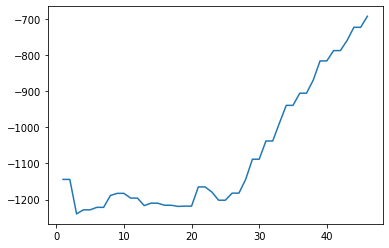

In [27]:
plt.plot(df['episode_reward_mean'])

In [28]:
ray.shutdown()
ray.init()
ModelCatalog.register_custom_model("rbf", RBFModel1)
ModelCatalog.register_custom_model("rbf_2", RBFModel2)
ModelCatalog.register_custom_model("mlp_1_256", MyKerasModel1)
ModelCatalog.register_custom_model("mlp_2_64", MyKerasModel2)

if alg == "PPO":
    trainer = ppo.PPOTrainer(config)
if alg == "SAC":
    trainer = sac.SACTrainer(config)
if alg == "DDPG":
    trainer = ddpg.DDPGTrainer(config)
if alg == "PG":
    trainer = pg.PGTrainer(config)
if alg == "A3C":
    trainer = a3c.A3CTrainer(config)
if alg == "TD3":
    trainer = td3.TD3Trainer(config)

trainer.restore(checkpoint_path)

2020-02-10 13:56:27,630	WARNING services.py:592 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-02-10 13:56:27,632	INFO resource_spec.py:212 -- Starting Ray with 14.11 GiB memory available for workers and up to 7.08 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-02-10 13:56:27,952	WARNING services.py:1080 -- Failed to start the dashboard. The dashboard requires Python 3 as well as 'pip install aiohttp psutil setproctitle grpcio'.
2020-02-10 13:56:39,574	INFO trainable.py:178 -- _setup took 11.122 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2020-02-10 13:56:39,575	WARNING util.py:41 -- Install gputil for GPU system monitoring.
2020-02-10 13:56:39,615	WARNING trainable.py:210 -- Getting current IP.
2020-02-10 13:56:39,616	INFO trainable.py:416 -- Restored on 128.111.57.123 from checkpoint: /home/

In [21]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import pybullet_envs
%matplotlib inline

#env = gym.make(env_name)
#env.unwrapped.reset_model = det_reset_model

# !! this needs to reflect the environemnt you trained in
#env = gym.make("Pendulum-v0")
if "Bullet" in current_env:
    env = gym.make(current_env, render=True)
else:
    env = gym.make(current_env)

In [22]:
env._max_episode_steps = 10000
obs = env.reset()



action_hist = []
m_act_hist = []
state_hist  = []
obs_hist = []
reward_hist = []

done = False
for t in range(10000):
    # for some algorithms you can get the sample mean out, need to change the value on the index to match your env for now
    # mean_actions = out_dict['behaviour_logits'][:17]
    # actions = trainer.compute_action(obs.flatten())
    sampled_actions, _ , out_dict = trainer.compute_action(obs.flatten(),full_fetch=True)
    
    actions = sampled_actions
    
    obs, reward, done, _ = env.step(np.asarray(actions))
    
    # !! uncomment to render
    env.render()
    
    action_hist.append(np.copy(actions))
    obs_hist.append(np.copy(obs))
    reward_hist.append(np.copy(reward))
print(sum(reward_hist))
print((obs_hist))
#plt.plot(action_hist)
#plt.figure()
#plt.figure()
#plt.plot(obs_hist)
#plt.figure()

-12259.662809359716


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
# Reminder that the bahavior logits that come out are the mean and logstd (not log mean, despite the name logit)
trainer.compute_action(obs, full_fetch=True)

NameError: name 'obs' is not defined

(pid=12929) Using TensorFlow backend.
(pid=12933) Using TensorFlow backend.
(pid=12938) Using TensorFlow backend.
(pid=12928) Using TensorFlow backend.
(pid=12945) Using TensorFlow backend.
(pid=12935) Using TensorFlow backend.
(pid=12939) Using TensorFlow backend.
(pid=12926) Using TensorFlow backend.
(pid=12944) Using TensorFlow backend.
(pid=12947) Using TensorFlow backend.
(pid=12949) Using TensorFlow backend.
(pid=12927) Using TensorFlow backend.
(pid=12930) Using TensorFlow backend.
(pid=12932) Using TensorFlow backend.
(pid=12941) Using TensorFlow backend.
(pid=12946) Using TensorFlow backend.
